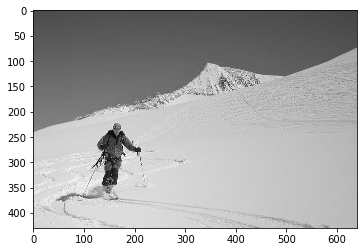

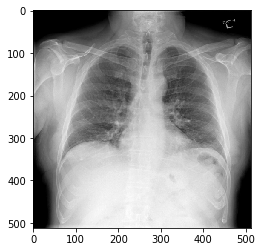

In [1]:
import matplotlib.pyplot as plt
from skimage import io,exposure,img_as_float
import numpy as np
from math import sqrt

a=io.imread('000000038118.jpg')
b=io.imread('CXR7_IM-2263-1001.png')

plt.imshow(a,cmap='gray',interpolation='nearest')
plt.show()
plt.imshow(b, cmap='gray', interpolation='nearest') 
plt.show()

In [2]:
from models.lip import LIPImage,LIPSpace
from models.hlip import HLIPImage,HLIPSpace
from models.pslip import PSLIPImage,PSLIPSpace
from models.plip import PLIPSpace
from models.ppslip import PPSLIPSpace
from models.slip import SLIPImage,SLIPSpace
from models.logimg import LogSpace

In [3]:
def space_affine_transform(image:np.ndarray,a:int,b:int,space:LogSpace):
    aux_image=space.gray_tone(image)
    sigma=sqrt((b-a)**2/12)
    mean_image=np.mean(aux_image)
    variance_image=sqrt(np.var(aux_image))
    return space.inverse_gray_tone(space.s_mul(space.sub(aux_image,mean_image),sigma/variance_image))

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

## Lineal

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


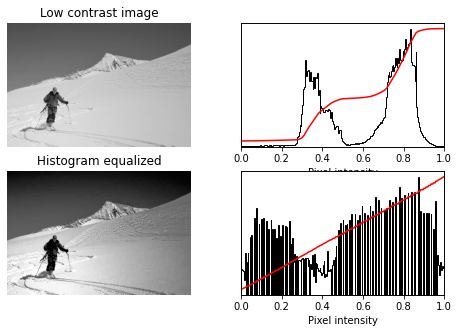

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


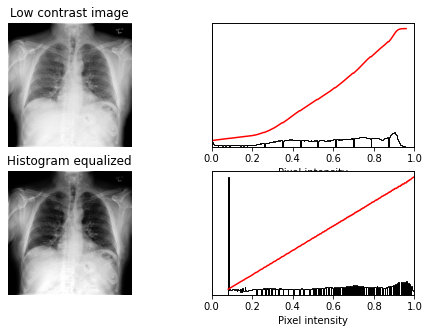

In [4]:
limg_eq_a = exposure.equalize_hist(a)

io.imsave('limg_eq_a.png',limg_eq_a)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(a, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(limg_eq_a, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

limg_eq_b = exposure.equalize_hist(b)

io.imsave('limg_eq_b.png',limg_eq_b)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(b, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(limg_eq_b, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

## SLIP

Lossy conversion from float64 to uint8. Range [-238.12804487453138, 255.9990242343873]. Convert image to uint8 prior to saving to suppress this warning.


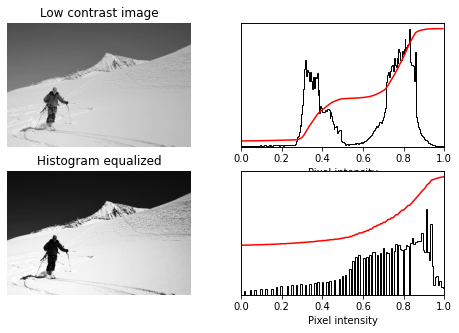

Lossy conversion from float64 to uint8. Range [-209.1337441262375, 254.35524339759448]. Convert image to uint8 prior to saving to suppress this warning.


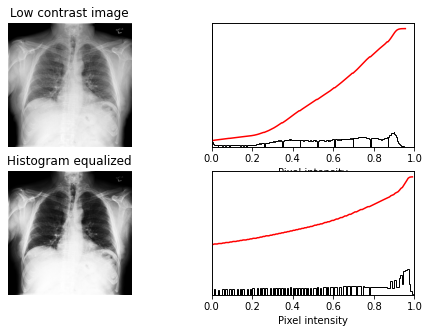

In [5]:
js=SLIPSpace()

jimg_eq_a = space_affine_transform(a,-256,256,js)

io.imsave('jimg_eq_a.png',jimg_eq_a)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(a/256, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(jimg_eq_a/256, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

jimg_eq_b = space_affine_transform(b,-256,256,js)

io.imsave('jimg_eq_b.png',jimg_eq_b)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(b/256, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(jimg_eq_b/256, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

Lossy conversion from float64 to uint8. Range [9.953268431672768e-09, 255.73700915759082]. Convert image to uint8 prior to saving to suppress this warning.


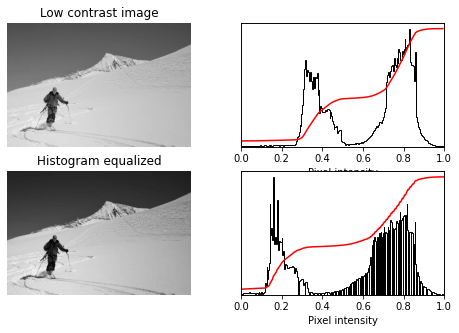

Lossy conversion from float64 to uint8. Range [2.4059586678504274e-06, 245.20445082666328]. Convert image to uint8 prior to saving to suppress this warning.


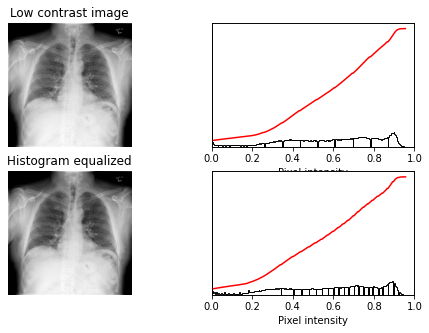

In [6]:
hs=HLIPSpace()

himg_eq_a = space_affine_transform(a,-1,1,hs)
 
io.imsave('himg_eq_a.png',himg_eq_a)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(a/256, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(himg_eq_a/256, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

hs2=HLIPSpace()

himg_eq_b = space_affine_transform(b,-1,1,hs2)

io.imsave('himg_eq_b.png',himg_eq_b)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(b/256, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(himg_eq_b/256, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

/tmp/ipykernel_3618/2670307371.py:7: UserWarning: psimg_eq_a.png is a low contrast image
  io.imsave('psimg_eq_a.png',psimg_eq_a)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


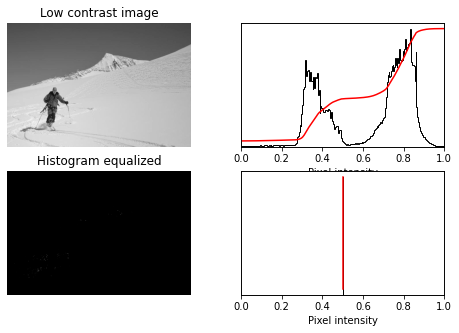

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


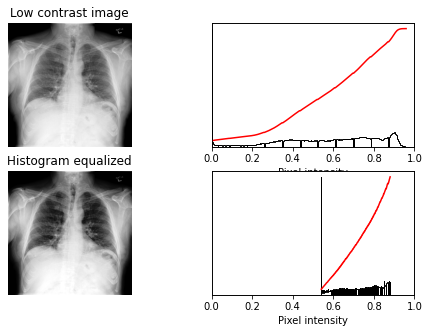

In [25]:
pss=PSLIPSpace()

psa=pss.function(pss.gray_tone(a))

psimg_eq_a = pss.inverse_gray_tone(pss.inverse_function(exposure.equalize_hist(psa)))
 
io.imsave('psimg_eq_a.png',psimg_eq_a)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(a, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(psimg_eq_a, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

pss2=HLIPSpace(1)

psb=pss2.function(pss2.gray_tone(b))

psimg_eq_b = pss2.inverse_gray_tone(pss2.inverse_function(exposure.equalize_hist(psb)))

io.imsave('psimg_eq_b.png',psimg_eq_b)

fig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(b, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(psimg_eq_b, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()

## PLIP

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


16.015625 0.9765625


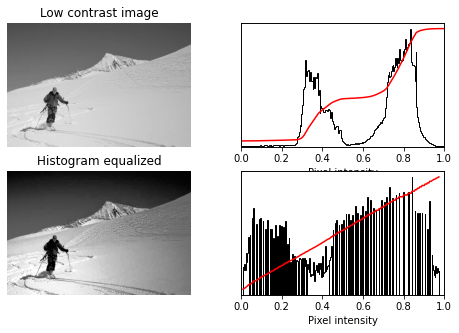

In [23]:
from emee import emee

mis=[256,400,500,800,1000,1026,4100,600,300,250,200]
gammas=[256,400,1000,2000,300,500,600,512,1026,4100,1280,800,526]

mis=[i/256 for i in mis]

gammas=[i/256 for i in gammas]

ps=PLIPSpace(1)

fa=a/256

d_1 = 4 if a.shape[0]%4==0 else 5
d_2 = 4 if a.shape[1]%4==0 else 5
max_emee=-1
max_gamma=-1
max_mi=-1
for ga in gammas:
    pa=ps.function(ps.gray_tone(fa,1),ga)
    pimg_eq_a=ps.inverse_function(exposure.equalize_hist(pa),ga)
    for mi in mis:
        max_pi_r=np.max(pimg_eq_a)
        if mi < max_pi_r:
            continue
        result=ps.inverse_gray_tone(pimg_eq_a,mi)
        actual_emee=emee(result,1,d_1,d_2,0.5)
        if actual_emee > max_emee:
            max_emee=actual_emee
            max_gamma=ga
            max_mi=mi
pa=ps.function(ps.gray_tone(fa,1),max_gamma)
result=ps.inverse_gray_tone(ps.inverse_function(exposure.equalize_hist(pa),max_gamma),max_mi)
print(max_gamma,max_mi)

io.imsave('pb_spa.jpg',result)

ig = plt.figure(figsize=(8, 5))

ax_img = plt.subplot(2, 2, 1)

ax_hist = plt.subplot(2, 2, 2)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(a, (ax_img, ax_hist))

ax_img.set_title('Low contrast image')

ax_img = plt.subplot(2, 2, 3)

ax_hist = plt.subplot(2, 2, 4)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(result, (ax_img, ax_hist))

ax_img.set_title('Histogram equalized')

plt.show()